# Set-Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre-Processing

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/emoticons/data.csv')
data.head()

,sentence,feeling
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear


In [ ]:
data.shape

(19997, 2)

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')

# load the dataset into a pandas dataframe

# create a spacy nlp object
nlp = spacy.load("en_core_web_sm")

# create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# create a list of stop words
stop_words = set(stopwords.words('english'))

# define a function to preprocess text
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # apply spacy nlp to tokenize and lemmatize the text
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    # remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # join the tokens back into a string
    processed_text = ' '.join(tokens)
    return processed_text

# apply the preprocess_text function to the text column of the dataframe
data['sentence'] = data['sentence'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,sentence,feeling
0,I update blog I feel shitty,sadness
1,I never make separate I I ever want feel like ...,sadness
2,I leave bouquet red yellow tulip arm feel slig...,joy
3,I feel little vain I one,sadness
4,I walk shop anywhere I feel uncomfortable,fear


In [ ]:
X = data.sentence
y = data.feeling

In [ ]:
X.head()

0                          I update blog I feel shitty
1    I never make separate I I ever want feel like ...
2    I leave bouquet red yellow tulip arm feel slig...
3                             I feel little vain I one
4            I walk shop anywhere I feel uncomfortable
Name: sentence, dtype: object

In [ ]:
y[:10]

0    sadness
1    sadness
2        joy
3    sadness
4       fear
5      anger
6        joy
7        joy
8      anger
9       fear
Name: feeling, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# stratify=y, 
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, train_size=0.8,random_state=1234)

X_train.shape

(15997,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=list(stop_words))

X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)  

In [ ]:
print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])

train size: (15997, 11928)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (4000, 11928)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'Count')

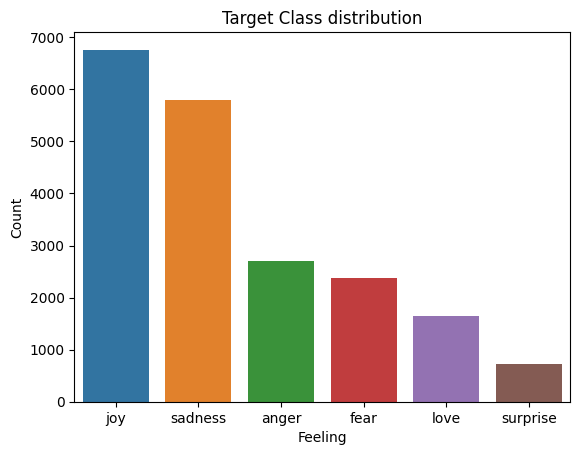

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count the number of occurrences of each string in the DataFrame
counts = data['feeling'].value_counts()

# create a bar plot of the counts using seaborn
sns.barplot(x=counts.index, y=counts.values)

# add a title and labels to the plot
plt.title('Target Class distribution')
plt.xlabel('Feeling')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

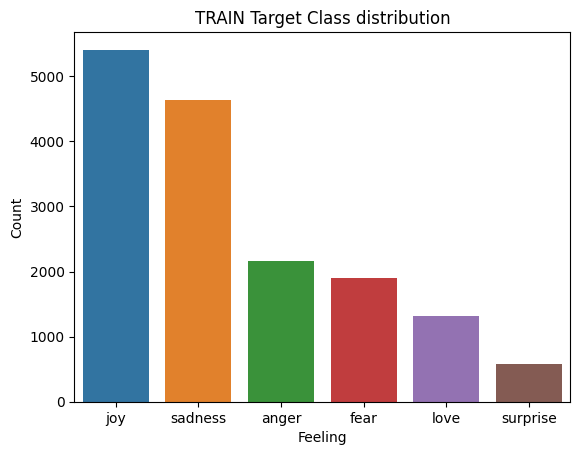

In [ ]:
train_counts = y_train.value_counts()
# create a bar plot of the counts using seaborn
sns.barplot(x=counts.index, y=train_counts.values)

# add a title and labels to the plot
plt.title('TRAIN Target Class distribution')
plt.xlabel('Feeling')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

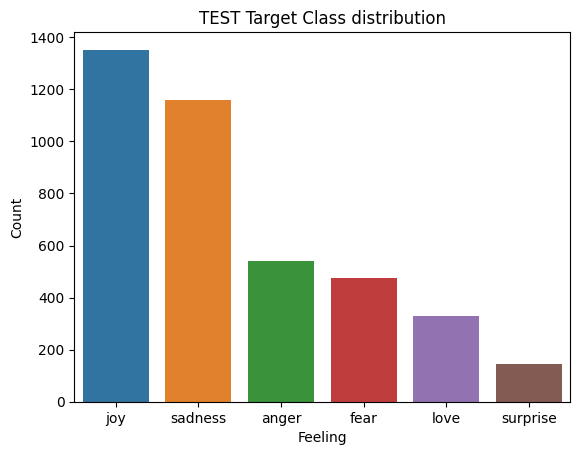

In [ ]:
test_counts = y_test.value_counts()
# create a bar plot of the counts using seaborn
sns.barplot(x=counts.index, y=test_counts.values)

# add a title and labels to the plot
plt.title('TEST Target Class distribution')
plt.xlabel('Feeling')
plt.ylabel('Count')

## Describe the data set and what the model should be able to predict:

The dataset has 2 columns, a column containing sentences and a column containing the corresponding feeling for the sentence. Once trained, a model should be able to take in a sentence as input, and correctly classify the emotion in the sentence.

# Classifiers

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# priors
import math

class_counts = y_train.value_counts()
prior = class_counts / class_counts.sum()
log_prior = pd.Series(list(map(math.log, prior)))
print('prior spam:\n', prior, 'log of prior:\n', log_prior)

print(naive_bayes.class_log_prior_)

prior spam:
 joy         0.338126
sadness     0.289742
anger       0.135463
fear        0.118647
love        0.082078
surprise    0.035944
Name: feeling, dtype: float64 log of prior:
 0   -1.084337
1   -1.238765
2   -1.999057
3   -2.131601
4   -2.500087
5   -3.325786
dtype: float64
[-1.99905748 -2.1316005  -1.08433697 -2.50008661 -1.23876501 -3.32578644]


In [ ]:
# what else did it learn from the data?
# the log likelihood of words given the class

naive_bayes.feature_log_prob_

array([[ -9.34976823,  -9.77498145,  -9.77498145, ...,  -9.77498145,
         -9.77498145,  -9.77498145],
       [ -9.40497471,  -9.73179273,  -9.73179273, ...,  -9.73179273,
         -9.73179273,  -9.73179273],
       [-10.17544913,  -9.76014488, -10.17544913, ..., -10.17544913,
         -9.84504176, -10.17544913],
       [ -9.64701021,  -9.64701021,  -9.64701021, ...,  -9.64701021,
         -9.37255231,  -9.64701021],
       [ -9.66436552, -10.07875185,  -9.67853277, ...,  -9.77623576,
        -10.07875185,  -9.79117385],
       [ -9.50898118,  -9.50898118,  -9.50898118, ...,  -9.50898118,
         -9.50898118,  -9.50898118]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# make predictions on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))

# confusion matrix has this form
#     tp   fp
#     fn   tn


[[ 186    3  184    0  169    0]
 [   5  126  172    0  172    0]
 [   0    0 1331    0   21    0]
 [   0    0  247   31   50    0]
 [   0    1   95    0 1063    0]
 [   1    8   78    0   55    2]]


In [ ]:
label=['joy','sadness','anger','fear','love','surprise']
print('accuracy score: ', accuracy_score(y_test, pred))
      
print('\nprecision score (per label): ', precision_score(y_test, pred, labels=label, average=None, zero_division=1))
print('\nprecision score (weighted average): ', precision_score(y_test, pred, average='weighted', zero_division=1))


print('\nrecall score: (per label)', recall_score(y_test, pred, labels=label, average=None))
print('\nrecall score: (weighted average)', recall_score(y_test, pred, labels=label, average='weighted'))

      
print('\nf1 score (raw): ', f1_score(y_test, pred, average=None))
print('\nf1 score (weighted): ', f1_score(y_test, pred, average='weighted'))

accuracy score:  0.68475

precision score (per label):  [0.63170384 0.69477124 0.96875    0.91304348 1.         1.        ]

precision score (weighted average):  0.7725154047467487

recall score: (per label) [0.98446746 0.91716997 0.34317343 0.26526316 0.0945122  0.01388889]

recall score: (weighted average) 0.68475

f1 score (raw):  [0.50681199 0.41109299 0.76958659 0.17270195 0.79062849 0.02739726]

f1 score (weighted):  0.6218430477029387


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.97      0.34      0.51       542
        fear       0.91      0.27      0.41       475
         joy       0.63      0.98      0.77      1352
        love       1.00      0.09      0.17       328
     sadness       0.69      0.92      0.79      1159
    surprise       1.00      0.01      0.03       144

    accuracy                           0.68      4000
   macro avg       0.87      0.44      0.45      4000
weighted avg       0.77      0.68      0.62      4000



In [ ]:
print('spam size in test data:',y_test[y_test==0].shape[0])
print('test size: ', len(y_test))
baseline = y_test[y_test==0].shape[0] / y_test.shape[0] 
print(baseline)

spam size in test data: 0
test size:  4000
0.0


In [ ]:
y_test[y_test != pred]


2260      sadness
13774        fear
6910         fear
9281     surprise
8532        anger
           ...   
16174        fear
4740        anger
6062         fear
3158      sadness
8870        anger
Name: feeling, Length: 1261, dtype: object

In [ ]:
for i in [1764, 10528, 13167, 187, 3982, 13734,17159, 3185, 4654, 15432]:
    print(data.loc[i])

sentence    I learn learn lesson matter I feel even may fe...
feeling                                                  love
Name: 1764, dtype: object
sentence    I want feel admired love
feeling                         love
Name: 10528, dtype: object
sentence    I feel overwhelmed excitement anxiety I prepar...
feeling                                                  fear
Name: 13167, dtype: object
sentence    I feel kinda weird andrea try talk I chris
feeling                                           fear
Name: 187, dtype: object
sentence    I still look good cause I feel passionate volu...
feeling                                                  love
Name: 3982, dtype: object
sentence    I feel reject like I belong circle circle I re...
feeling                                               sadness
Name: 13734, dtype: object
sentence    I feel anxious worry case I understand custome...
feeling                                                  fear
Name: 17159, dtype: object
sentence   

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create a Logistic Regression object
lr = LogisticRegression()

# fit the classifier on the train data
lr.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = lr.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_lr)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.84775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('\nprecision score (per label): ', precision_score(y_test, y_pred_lr, labels=label, average=None, zero_division=1))
print('\nprecision score (weighted average): ', precision_score(y_test, y_pred_lr, average='weighted', zero_division=1))


print('\nrecall score: (per label)', recall_score(y_test, y_pred_lr, labels=label, average=None))
print('\nrecall score: (weighted average)', recall_score(y_test, y_pred_lr, labels=label, average='weighted'))

      
print('\nf1 score (raw): ', f1_score(y_test, y_pred_lr, average=None))
print('\nf1 score (weighted): ', f1_score(y_test, y_pred_lr, average='weighted'))


precision score (per label):  [0.82315113 0.86363636 0.91220557 0.84470588 0.81276596 0.8255814 ]

precision score (weighted average):  0.8487441334118182

recall score: (per label) [0.94674556 0.91803279 0.78597786 0.75578947 0.58231707 0.49305556]

recall score: (weighted average) 0.84775

f1 score (raw):  [0.8444004  0.79777778 0.88063295 0.67850799 0.89000418 0.6173913 ]

f1 score (weighted):  0.8425487578061324


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       anger       0.91      0.79      0.84       542
        fear       0.84      0.76      0.80       475
         joy       0.82      0.95      0.88      1352
        love       0.81      0.58      0.68       328
     sadness       0.86      0.92      0.89      1159
    surprise       0.83      0.49      0.62       144

    accuracy                           0.85      4000
   macro avg       0.85      0.75      0.78      4000
weighted avg       0.85      0.85      0.84      4000



# Neural Networks


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,10), random_state=1234, max_iter=1000, learning_rate_init=0.001)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=1000, random_state=1234)

In [ ]:
y_pred_mlp = mlp.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_mlp)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.80775


In [ ]:
print('\nprecision score (per label): ', precision_score(y_test, y_pred_mlp, labels=label, average=None, zero_division=1))
print('\nprecision score (weighted average): ', precision_score(y_test, y_pred_mlp, average='weighted', zero_division=1))


print('\nrecall score: (per label)', recall_score(y_test, y_pred_mlp, labels=label, average=None))
print('\nrecall score: (weighted average)', recall_score(y_test, y_pred_mlp, labels=label, average='weighted'))

      
print('\nf1 score (raw): ', f1_score(y_test, y_pred_mlp, average=None))
print('\nf1 score (weighted): ', f1_score(y_test, y_pred_mlp, average='weighted'))


precision score (per label):  [0.83406755 0.835      0.85381356 0.8034188  0.60571429 0.68918919]

precision score (weighted average):  0.8094331835641909

recall score: (per label) [0.84023669 0.8645384  0.74354244 0.79157895 0.64634146 0.70833333]

recall score: (weighted average) 0.80775

f1 score (raw):  [0.79487179 0.79745493 0.83714075 0.62536873 0.84951251 0.69863014]

f1 score (weighted):  0.8079336446602935


In [ ]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

       anger       0.85      0.74      0.79       542
        fear       0.80      0.79      0.80       475
         joy       0.83      0.84      0.84      1352
        love       0.61      0.65      0.63       328
     sadness       0.83      0.86      0.85      1159
    surprise       0.69      0.71      0.70       144

    accuracy                           0.81      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.81      0.81      0.81      4000



#Analysis of the performance of various approaches:

##Naive Bayes: 

Naive Bayes was the least accurate of the models, with an accuracy score of 67%. Its interesting to note that the percision, recall, and f1 scores varied across the classes. Some classes had really high precision, a couple had perfect precision, which might suggest overfitting of the data. Some recalls were really good at 92 and 97%, while others were 27% or even 0%. With the exception of one 0%, most of the f1 scores were in the middle percentiles.

Even though Naive Bayes wasn't super accurate, it was able to run really fast to get results. 


##Logistic Regression:
Logistic regression actually fit very nicely. The accuracy was 84%, which is quite good! the percisions were really stable for each class compared to naive bayes, all hanging around the 80-90% range. The same can be said for the f1 scores. Recall was mostly good, but the last 2 classes (love, surprise) only had a recall of 54 and 39%. 

Interestingly, the logistic regression hit those great metrics without the model ever converging. After trying to fit the model I see this message:
```
ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
```
I tried to see how I could get the model to converge, but did not find a way to. Regardless, the model performed really well!

The logistic regression model took 3 seconds to run, which is not very long at all, and even though it was slower than the naive bayes model, it outperformed it by a long shot. 

##Neural Networks: 

For the multilayered perceptron, I was able to achieve an accuracy score of 81.725%. This is close to logistic regression, but not quite as good. The percision scores were lower across the board than Logistic regression, with classes in the 70's to low 80's. Recall was in this range of 60-80 %. F1 score was also in the 60-80% range. So the metrics were fairly even for the nerual network.

I tried playing around with the learning rate, the number of iterations, the number of hidden layers, and their sizes. The best accuracy I was able to achieve was 81.725%

The neural network took a whole minute to train. Which was significantly longer than either logistic regression or naive bayes. I have to say, the much longer run time did not pay off for the neural network, as the logistic regression won out on basically every metric. 